In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|mogadishu
Processing record 2|borogontsy
Processing record 3|avarua
Processing record 4|cape town
Processing record 5|san quintin
Processing record 6|busselton
Processing record 7|ambon
Processing record 8|puerto ayora
Processing record 9|pisco
Processing record 10|hilo
Processing record 11|rikitea
Processing record 12|port hedland
Processing record 13|saint-philippe
Processing record 14|vaini
Processing record 15|akdepe
Processing record 16|tocopilla
Processing record 17|villarrica
Processing record 18|bundaberg
Processing record 19|sinnamary
Processing record 20|ponta do sol
Processing record 21|wewak
Processing record 22|dolinsk
Processing record 23|hurghada
City not found. skipping.
Processing record 24|vao
Processing record 25|port lincoln
Processing record 26|erdenet
City not found. skipping.
Processing record 27|jaque
Processing record 28|hasaki
Processing record 29|gold coast
Processing record 30|tilichiki
Processing record 31|samarai
Processing record 32|za

Processing record 247|ciudad bolivar
Processing record 248|flinders
Processing record 249|hamilton
Processing record 250|norman wells
Processing record 251|cabo san lucas
Processing record 252|nyimba
Processing record 253|terrace bay
Processing record 254|namibe
Processing record 255|tungawan
Processing record 256|sao joao da barra
Processing record 257|labuhan
Processing record 258|torbay
Processing record 259|oranjemund
Processing record 260|gonbad-e qabus
Processing record 261|urucara
City not found. skipping.
Processing record 262|husainabad
Processing record 263|cumpas
Processing record 264|eastbourne
Processing record 265|sao jose do belmonte
Processing record 266|racine
Processing record 267|gao
Processing record 268|tuatapere
Processing record 269|dossor
Processing record 270|betafo
City not found. skipping.
Processing record 271|mattru
Processing record 272|novyy svit
Processing record 273|placido de castro
Processing record 274|havoysund
Processing record 275|muros
Processing

Processing record 497|vestmannaeyjar
Processing record 498|marsabit
Processing record 499|jinzhou
Processing record 500|xapuri
Processing record 501|nuuk
Processing record 502|cayenne
Processing record 503|waipawa
Processing record 504|nushki
Processing record 505|yerbogachen
Processing record 506|waingapu
Processing record 507|lichtenburg
Processing record 508|eyemouth
Processing record 509|itarema
Processing record 510|birao
Processing record 511|elko
Processing record 512|port-gentil
Processing record 513|bokoro
Processing record 514|chegdomyn
Processing record 515|deep river
Processing record 516|bahile
Processing record 517|abalak
Processing record 518|lewiston
Processing record 519|moissala
Processing record 520|jijiga
Processing record 521|yarmouth
Processing record 522|itoman
Processing record 523|alkhazurovo
Processing record 524|arman
Processing record 525|port hawkesbury
Processing record 526|chikwawa
Processing record 527|vershino-shakhtaminskiy
Processing record 528|beloha

In [21]:
# Create a panda data frame using data retrieved
cities_df = pd.DataFrame({ 
                "City" : city_name,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date}) 

In [22]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mogadishu,2.0371,45.3438,78.80,65,90,9.22,SO,1620282929
1,Borogontsy,62.6683,131.1683,45.07,58,100,6.42,RU,1620282929
2,Avarua,-21.2078,-159.7750,77.00,78,90,5.75,CK,1620282929
3,Cape Town,-33.9258,18.4232,59.00,88,40,23.02,ZA,1620282929
4,San Quintín,30.4833,-115.9500,60.69,87,0,3.58,MX,1620282930
...,...,...,...,...,...,...,...,...,...
591,Xai-Xai,-25.0519,33.6442,72.57,67,87,2.01,MZ,1620283059
592,Hannibal,39.7084,-91.3585,54.00,50,75,3.44,US,1620282960
593,Scarborough,54.2797,-0.4044,39.00,79,11,1.01,GB,1620283059
594,Muisne,0.6000,-80.0333,76.39,88,100,6.17,EC,1620283059


In [32]:
cities_df.sort_values(by="Humidity", ascending=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
429,Senador Guiomard,-10.1522,-67.7392,71.60,100,0,2.30,BR,1620283023
480,Coyhaique,-45.5752,-72.0662,28.40,100,20,2.26,CL,1620283034
332,Macapá,0.0389,-51.0664,75.20,100,0,6.91,BR,1620283003
357,Alofi,-19.0595,-169.9187,77.00,100,100,3.44,NU,1620283008
500,Nuuk,64.1835,-51.7216,28.40,100,90,10.36,GL,1620283039
...,...,...,...,...,...,...,...,...,...
276,Abnūb,27.2696,31.1511,98.13,10,0,3.83,EG,1620282990
459,Yuanping,38.7153,112.7575,63.84,9,0,29.08,CN,1620283029
590,Bābai,22.7000,77.9333,106.79,9,6,8.77,IN,1620283058
184,Yumen,40.2833,97.2000,73.47,6,100,6.71,CN,1620282970


In [33]:
cities_df.to_csv("../output_data/cities.csv", index = False)

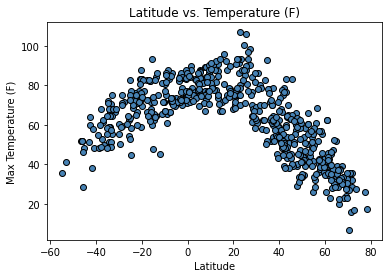

Temperatures decrease in cities further from the equator
Cities closer to or on the equator have the highest temperatures


In [47]:
#-------LATITUDE VS TEMPERATURE PLOT---------
X = cities_df["Lat"]
y = cities_df["Max Temp"]
#Plot data
plt.scatter(x,y, facecolor = "steelblue",edgecolor = "black")

#set labels for x and y axis
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Title
plt.title("Latitude vs. Temperature (F)")

plt.savefig("../output_data/lat_vs_temp.png")
plt.show()

print(f"Temperatures decrease in cities further from the equator")
print(f"Cities closer to or on the equator have the highest temperatures")


<function matplotlib.pyplot.show(close=None, block=None)>

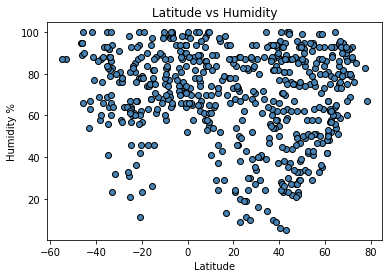

In [46]:
#---------LATITUDE VS HUMIDITY-------
#SET X AND Y
x = cities_df["Lat"]
y = cities_df["Humidity"]

#PLOT DATA
plt.scatter(x,y, facecolor = "steelblue",edgecolor = "black")

#SET LABELS FOR X AND Y AXIS
plt.xlabel("Latitude")

plt.ylabel("Humidity %")

#CREATE TITLE AND SAVE IMAGE
plt.title("Latitude vs Humidity")

plt.savefig("../output_data/lat_vs_humidity.png")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

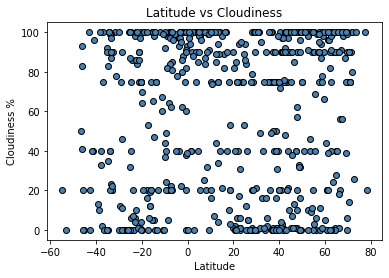

In [48]:
#SET X AND Y
x = cities_df["Lat"]
y = cities_df["Cloudiness"]

#PLOT DATA
plt.scatter(x,y, facecolor = "steelblue",edgecolor = "black")

#SET LABELS FOR X AND Y AXIS
plt.xlabel("Latitude")

plt.ylabel("Cloudiness %")

#CREATE TITLE AND SAVE IMAGE
plt.title("Latitude vs Cloudiness")

plt.savefig("../output_data/lat_vs_cloudiness.png")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

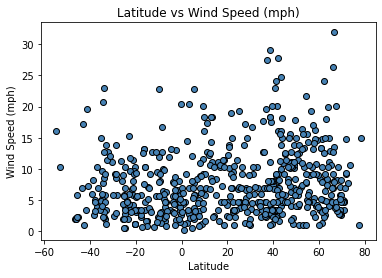

In [49]:
#SET X AND Y
x = cities_df["Lat"]
y = cities_df["Wind Speed"]

#PLOT DATA
plt.scatter(x,y, facecolor = "steelblue",edgecolor = "black")

#SET LABELS FOR X AND Y AXIS
plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

#CREATE TITLE AND SAVE IMAGE
plt.title("Latitude vs Wind Speed (mph)")

plt.savefig("../output_data/lat_vs_cloudiness.png")

plt.show

In [51]:
#NOTHERN AND SOUTHERN HEMISPHERES
hem_N = cities_df.loc[cities_df["Lat"]>0]
hem_S = cities_df.loc[cities_df["Lat"]<0]

In [70]:
def lin_reg(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.median(),y.median()),fontsize=17,color="red")
    plt.xlabel("Latitude")
    return line_eq



The r-squared is : -0.85


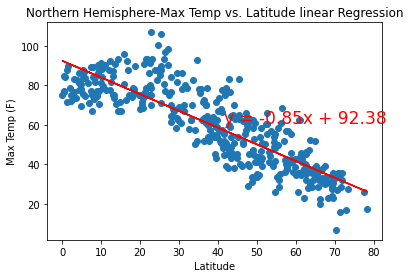

In [71]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_N["Lat"], hem_N["Max Temp"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Northern Hemisphere-Max Temp vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("../output_data/Northern_temp_vs_lat_linear.png")

The r-squared is : 0.69


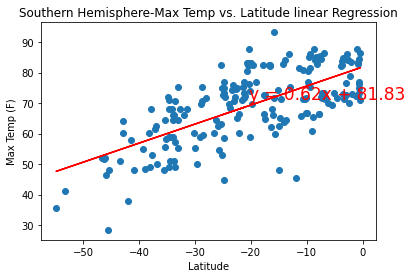

In [72]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_S["Lat"], hem_S["Max Temp"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Southern Hemisphere-Max Temp vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("../output_data/Southern_temp_vs_lat_linear.png")

The r-squared is : 0.02


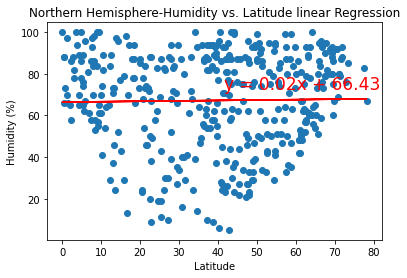

In [73]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_N["Lat"], hem_N["Humidity"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Northern Hemisphere-Humidity vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.savefig("../output_data/Northern_Humidity_vs_lat_linear.png")

The r-squared is : 0.07


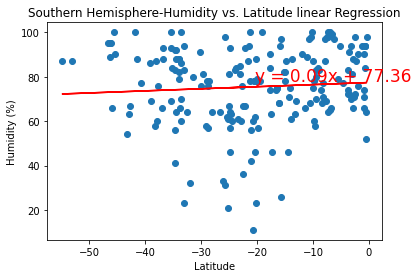

In [74]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_S["Lat"], hem_S["Humidity"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Southern Hemisphere-Humidity vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.savefig("../output_data/Southern_Humidity_vs_lat_linear.png")

The r-squared is : 0.0


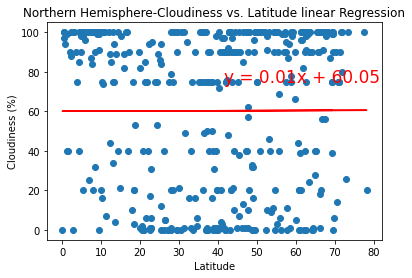

In [76]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_N["Lat"], hem_N["Cloudiness"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Northern Hemisphere-Cloudiness vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.savefig("../output_data/Northern_Cloudiness_vs_lat_linear.png")

The r-squared is : 0.22


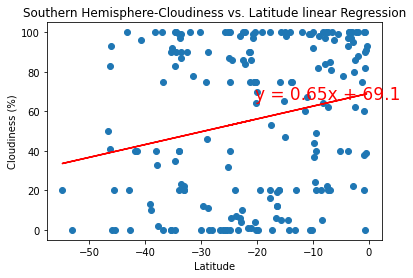

In [77]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_S["Lat"], hem_S["Cloudiness"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Southern Hemisphere-Cloudiness vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.savefig("../output_data/Southern_Cloudiness_vs_lat_linear.png")

The r-squared is : 0.09


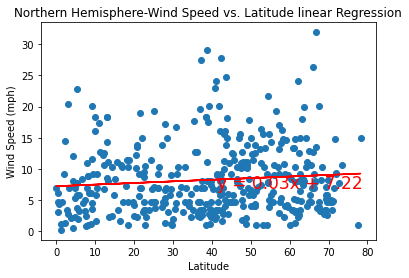

In [78]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_N["Lat"], hem_N["Wind Speed"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Northern Hemisphere-Wind Speed vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.savefig("../output_data/Northern_windSpeed_vs_lat_linear.png")

The r-squared is : -0.09


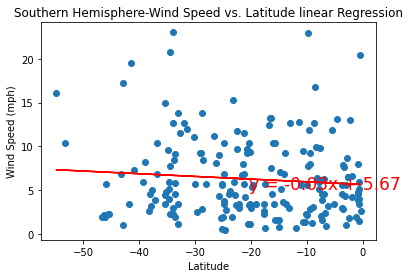

In [79]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_S["Lat"], hem_S["Wind Speed"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Southern Hemisphere-Wind Speed vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.savefig("../output_data/Southern_windSpeed_vs_lat_linear.png")